1)What is K-Nearest Neighbors (KNN) and how does it work?
KNN is a non-parametric, lazy learning algorithm used for classification and regression. 
It works by:
->Storing all the training data.
->When a new input comes in, it calculates the distance from the new point to all training points.
->It picks the K closest points (neighbors).
In classification: it assigns the class most common among the K neighbors.
In regression: it takes the average (or weighted average) of the neighbors’ values.

2)What is the difference between KNN Classification and KNN Regression?
Classification: Predicts a class label based on the majority vote among K neighbors.
Regression: Predicts a continuous value by averaging the K nearest values.

3)What is the role of the distance metric in KNN?
It decides how closeness is measured (e.g., Euclidean, Manhattan). It affects which neighbors are picked.

4)What is the Curse of Dimensionality in KNN?
When you have too many features (dimensions), distance becomes less meaningful.
→ All points seem similarly far → KNN can't tell which are truly close.

5)How can we choose the best value of K in KNN?
Try different K values using cross-validation and pick the one with best accuracy.
->Low K: More sensitive, may overfit.
->High K: More general, may underfit.
->Tip: Use an odd number for classification to avoid ties.

6)What are KD Tree and Ball Tree in KNN?
KD Tree is a way to organize data so that KNN can find neighbors faster. It splits the data into smaller parts based on the values of features (like age, height, etc.) and arranges them in a tree structure. This helps skip over data points that are too far away. KD Trees work best when the number of features is small.

Ball Tree is another method that also makes KNN faster. Instead of splitting by features, it groups points into round clusters called "balls." If a whole ball is too far from the point we're checking, KNN can skip it. Ball Trees work better than KD Trees when there are many features in the data.


7)When should you use KD Tree vs. Ball Tree?
KD Tree: Use for fewer dimensions and Euclidean distance.
Ball Tree: Use for high dimensions or non-Euclidean distances.

8)What are the disadvantages of KNN?
->Slow when predicting (since it checks all points).
->Needs feature scaling.
->Memory-heavy (stores all data).
->Sensitive to noise and irrelevant features.

9)How does feature scaling affect KNN?
Feature scaling is very important for KNN because it is a distance-based algorithm. KNN compares distances between data points to find the nearest neighbors, and if one feature has a larger range than others (like age vs. income), it can dominate the distance calculation. This can lead to poor predictions. So, we use feature scaling methods like standardization (z-score) or normalization (min-max) to bring all features to a similar scale, making the distance calculation fair and improving KNN's performance.

10)What is PCA (Principal Component Analysis)?
PCA is a technique to reduce the number of features i.e, dimensionality reduction technique  while keeping the most important information (variance). It creates new variables (called principal components).

11)How does PCA work?
It follows the following steps:
->Standardize the data.
->Find directions with highest variance (principal components).
->Project the data onto those directions to reduce dimensions.

12)What is the geometric intuition behind PCA?
Imagine rotating the dataset to align it with new axes that spread the data out the most. These axes are the principal components.

13)What is the difference between Feature Selection and Feature Extraction?
Feature Selection: Choose the best existing features.
Feature Extraction: Create new features from existing ones (like PCA does).

14)What are Eigenvalues and Eigenvectors in PCA?
Eigenvectors: Directions of new axes (components).
Eigenvalues: How much variance each direction captures.

15)How do you decide the number of components to keep?
To choose how many PCA components to keep, we look at how much information each one holds. The idea is to keep enough components so that we still have most of the important data, but with fewer features. Usually, we keep enough components to cover around 95% of the total information (variance). Another way is to use a graph called a scree plot and look for the point where the line bends—this shows the best number of components to keep.

16)Can PCA be used for classification?
Yes, as a preprocessing step.
It reduces dimensions → helps classifiers like KNN or SVM perform better

17)What are the limitations of PCA?
Only works well with linear relationships
Doesn’t use class labels
Can remove useful info for classification

18)How do KNN and PCA complement each other?
PCA reduces dimensions and noise ->KNN becomes faster and more accurate, especially in high-dimensional data.

19)How does KNN handle missing values in a dataset?
KNN doesn’t handle them directly.
You need to:
->Impute missing values (mean, median, or KNNImputer from sklearn)
->Or drop rows/columns with too many missing values.

20)What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
->PCA will reduce the number of features by keeping the ones where data varies the most, without caring about labels.
->LDA will reduce the number of features by keeping the ones that help me tell the classes apart clearly.

In [4]:
#21)Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [5]:
#22)Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 522.3194078689484


In [6]:
#23)Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print("Accuracy with Euclidean distance:", accuracy_euclidean)
print("Accuracy with Manhattan distance:", accuracy_manhattan)


Accuracy with Euclidean distance: 1.0
Accuracy with Manhattan distance: 1.0


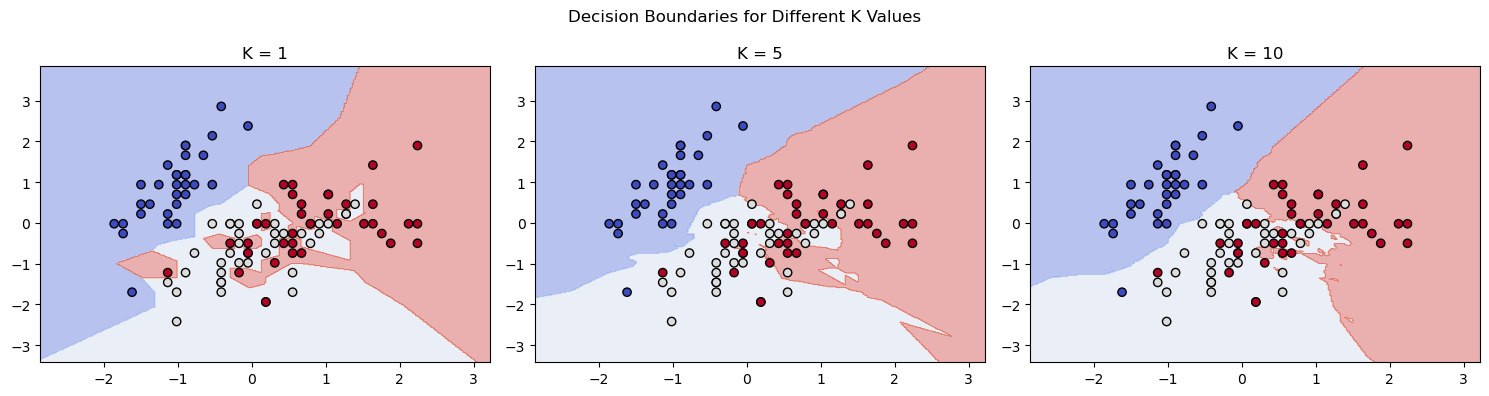

In [8]:
#24) Train a KNN Classifier with different values of K and visualize decision boundaried
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data[:, :2]  # Only first two features for 2D plotting
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

h = .02  # step size in the mesh

k_values = [1, 5, 10]

plt.figure(figsize=(15, 4))

for i, k in enumerate(k_values, 1):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)

    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"K = {k}")

plt.suptitle("Decision Boundaries for Different K Values")
plt.tight_layout()
plt.show()


In [9]:
#25) Apply Feature Scaling before training a KNN model and compare results with unscaled data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", accuracy_unscaled)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [10]:
#26)Train a PCA model on synthetic data and print the explained variance ratio for each component
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")


Principal Component 1: 0.4653
Principal Component 2: 0.4030
Principal Component 3: 0.1317
Principal Component 4: 0.0000
Principal Component 5: 0.0000


In [11]:
#27)Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy without PCA:", accuracy_without_pca)
print("Accuracy with PCA:", accuracy_with_pca)


Accuracy without PCA: 1.0
Accuracy with PCA: 0.9555555555555556


In [12]:
#28)Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best score: 0.9428571428571428


In [13]:
#29)Train a KNN Classifier and check the number of misclassified samples
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

misclassified = (y_test != y_pred).sum()
print(f"Number of misclassified samples: {misclassified}")


Number of misclassified samples: 0


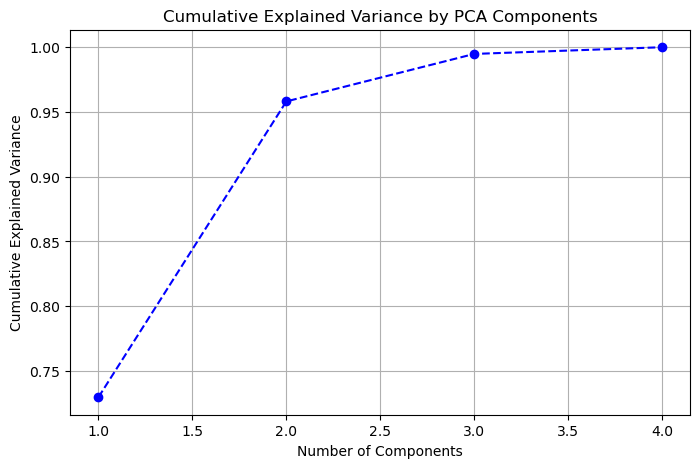

In [14]:
#30)Train a PCA model and visualize the cumulative explained variance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#  Load the dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate and plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [15]:
#31)Train a KNN Classifier using different values of the weights parameter (uniform vs. distance)
#and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

print("Accuracy with uniform weights:", accuracy_uniform)
print("Accuracy with distance weights:", accuracy_distance)



Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


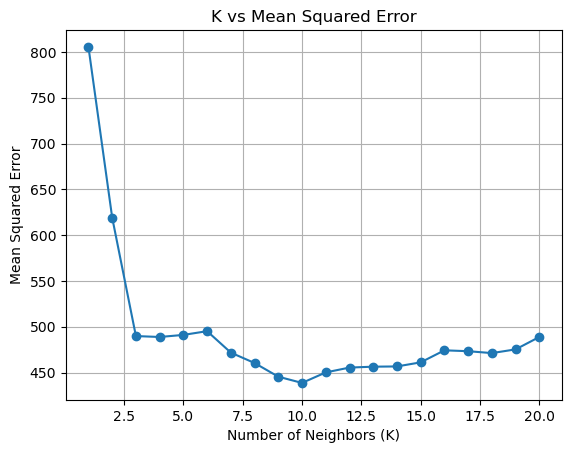

In [16]:
#32)Train a KNN Regressor and analyze the effect of different K values on performance
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.plot(k_values, mse_scores, marker='o')
plt.title('K vs Mean Squared Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()



In [17]:
#33)Implement KNN Imputation for handling missing values in a dataset
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.iloc[0:5, 0] = np.nan
df.iloc[10:15, 2] = np.nan

imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.166667               3.5                1.4               0.2
1           4.533333               3.0                1.4               0.2
2           4.666667               3.2                1.3               0.2
3           4.866667               3.1                1.5               0.2
4           5.166667               3.6                1.4               0.2
5           5.400000               3.9                1.7               0.4
6           4.600000               3.4                1.4               0.3
7           5.000000               3.4                1.5               0.2
8           4.400000               2.9                1.4               0.2
9           4.900000               3.1                1.5               0.1


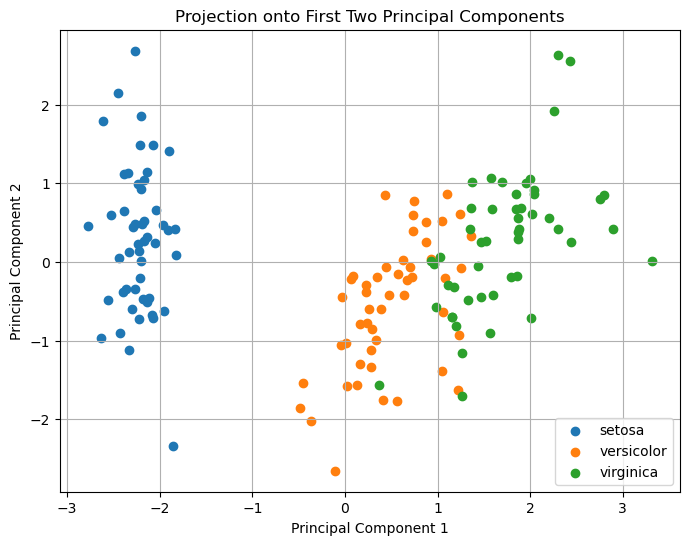

In [18]:
#34)Train a PCA model and visualize the data projection onto the first two principal components
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection onto First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#35)Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_kd = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=5)
start_kd = time.time()
knn_kd.fit(X_train_scaled, y_train)
y_pred_kd = knn_kd.predict(X_test_scaled)
time_kd = time.time() - start_kd
accuracy_kd = accuracy_score(y_test, y_pred_kd)

knn_ball = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=5)
start_ball = time.time()
knn_ball.fit(X_train_scaled, y_train)
y_pred_ball = knn_ball.predict(X_test_scaled)
time_ball = time.time() - start_ball
accuracy_ball = accuracy_score(y_test, y_pred_ball)

print("KD Tree - Accuracy:", accuracy_kd, "| Training Time:", round(time_kd, 6), "seconds")
print("Ball Tree - Accuracy:", accuracy_ball, "| Training Time:", round(time_ball, 6), "seconds")


KD Tree - Accuracy: 1.0 | Training Time: 0.010587 seconds
Ball Tree - Accuracy: 1.0 | Training Time: 0.18719 seconds


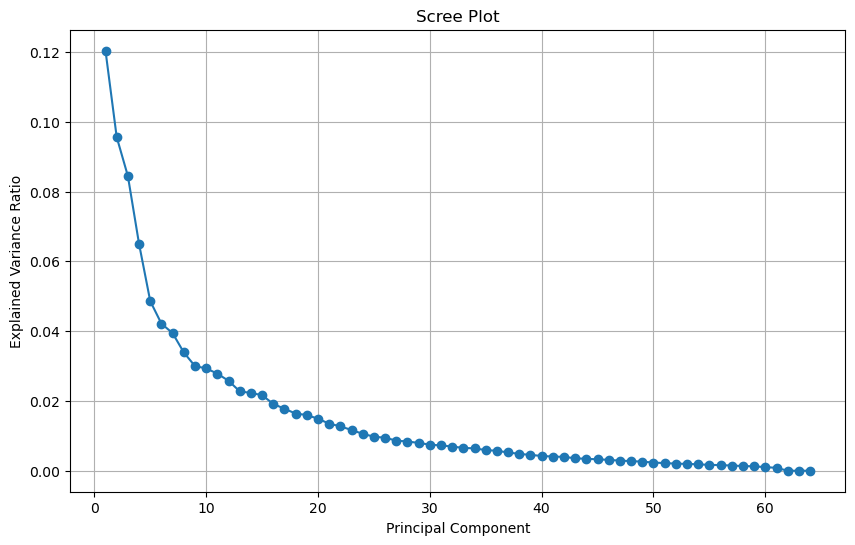

In [20]:
#36)Train a PCA model on a high-dimensional dataset and visualize the Scree plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_digits()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [21]:
#37)Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



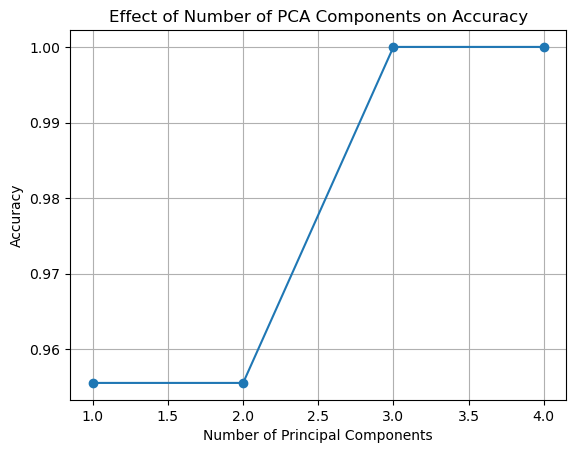

In [22]:
#38)Train a PCA model and analyze the effect of different numbers of components on accuracy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

components = [1, 2, 3, 4]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(components, accuracies, marker='o')
plt.title('Effect of Number of PCA Components on Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



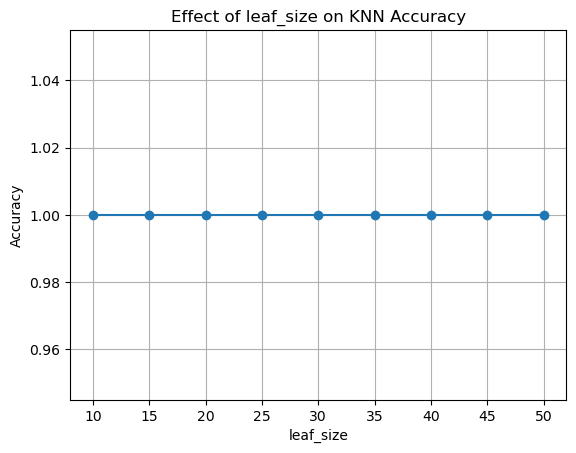

In [23]:
#39)Train a KNN Classifier with different leaf_size values and compare accuracy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

leaf_sizes = range(10, 51, 5)
accuracies = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(leaf_sizes, accuracies, marker='o')
plt.title('Effect of leaf_size on KNN Accuracy')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


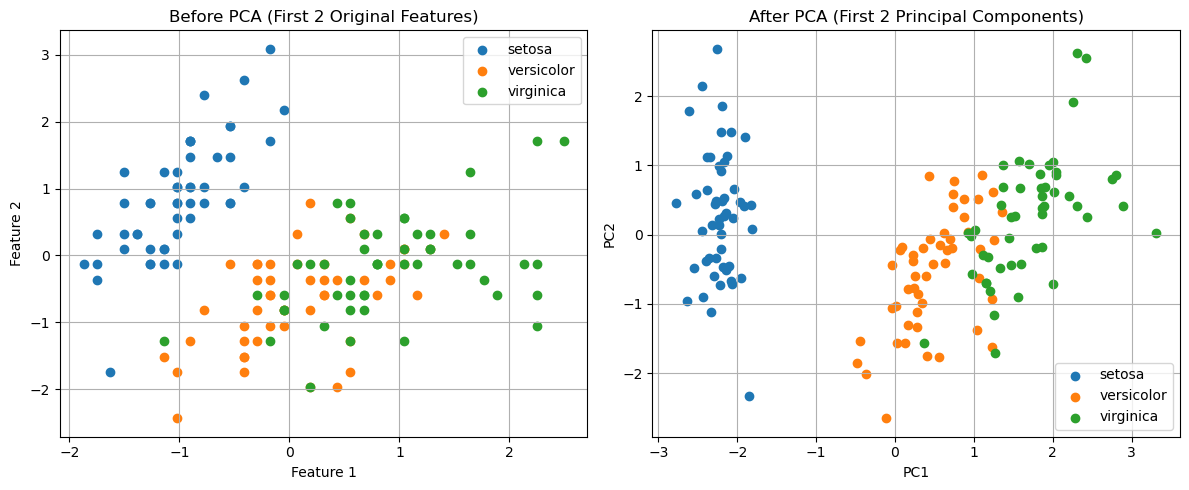

In [24]:
#40)Train a PCA model and visualize how data points are transformed before and after PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, target_name in enumerate(target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=target_name)
plt.title('Before PCA (First 2 Original Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.title('After PCA (First 2 Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
#41)Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
#42)Train a KNN Regressor and analyze the effect of different distance metrics on prediction error


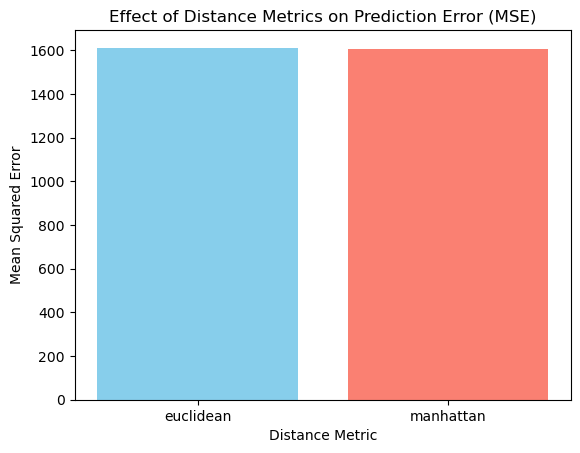

In [26]:
#43)Train a KNN Classifier and evaluate using ROC-AUC score

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

metrics = ['euclidean', 'manhattan']
mse_values = []

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.bar(metrics, mse_values, color=['skyblue', 'salmon'])
plt.title('Effect of Distance Metrics on Prediction Error (MSE)')
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.show()


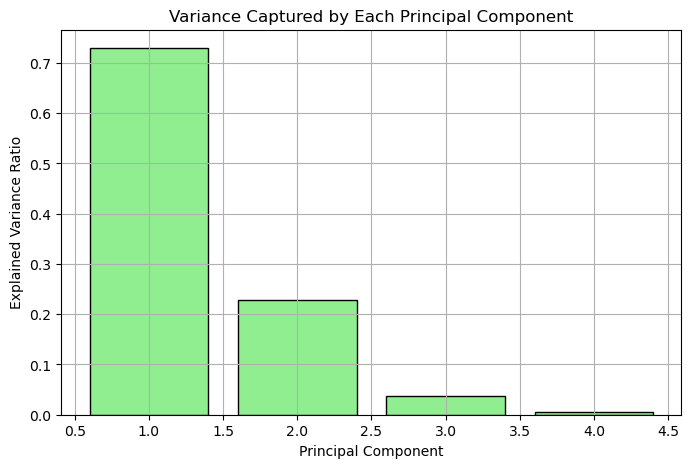

In [27]:
#44) Train a PCA model and visualize the variance captured by each principal component
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='lightgreen', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.grid(True)
plt.show()


In [28]:
#45)Train a KNN Classifier and perform feature selection before training
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)



Accuracy with selected features: 1.0


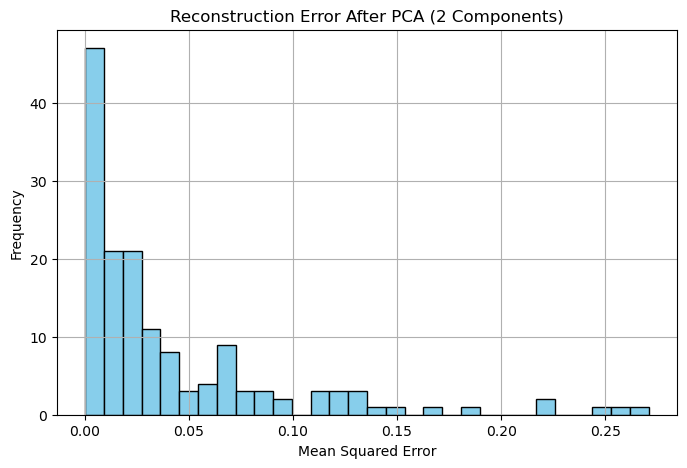

In [29]:
#46)rain a PCA model and visualize the data reconstruction error after reducing dimensions4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_reduced)

reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error, bins=30, color='skyblue', edgecolor='black')
plt.title('Reconstruction Error After PCA (2 Components)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [ ]:
#47)Train a KNN Classifier and visualize the decision boundary


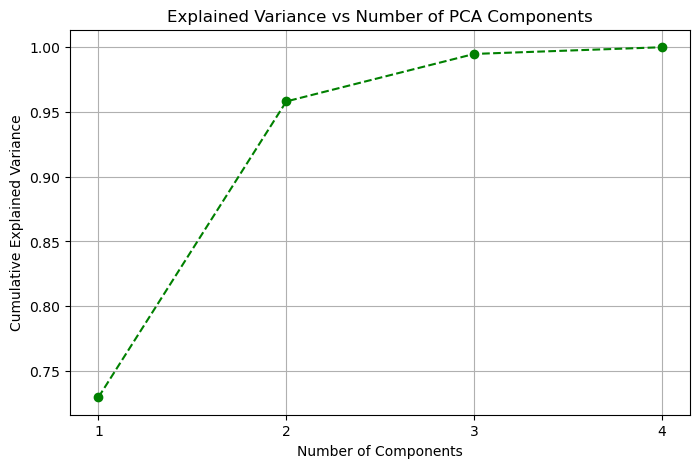

In [30]:

#48)Train a PCA model and analyze the effect of different numbers of components on data variance.
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

components = list(range(1, X.shape[1] + 1))
explained_variance = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(components, explained_variance, marker='o', linestyle='--', color='green')
plt.title('Explained Variance vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(components)
plt.grid(True)
plt.show()
